# Lab 1

By Niksh Hiremath (U20240158)


## 1. Code


### Importing libraries


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Reading image


In [2]:
IMAGE_PATH = "chromosomes.jpg"

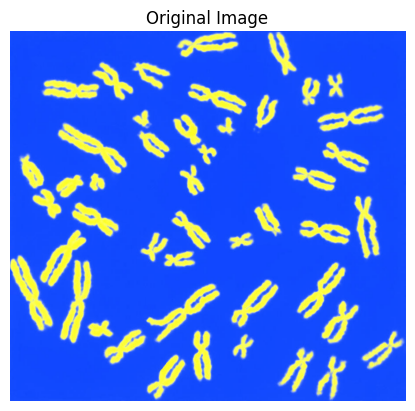

In [ ]:
# Reading as RGB image directly (not BGR image).
img = cv2.imread(IMAGE_PATH, cv2.IMREAD_COLOR_RGB)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")
plt.show()

### Converting image to grayscale


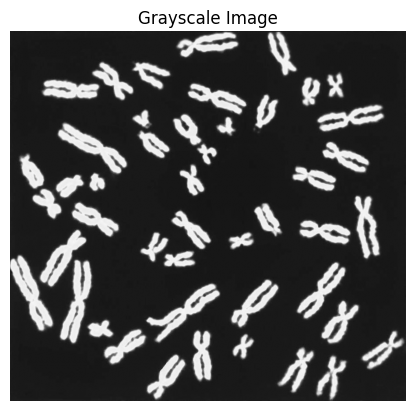

In [42]:
# Converts RGB image to Grayscale color space.
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

### Applying morphological opening


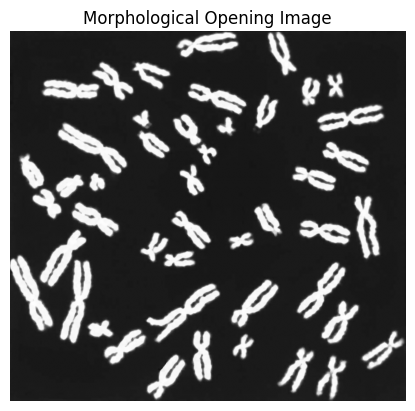

In [43]:
# Performs Opening to remove small white noise.
# kernel = np.ones((5, 5), np.uint8) - Basic square kernel
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))  # Elliptical kernel
opening = cv2.morphologyEx(gray_img, cv2.MORPH_OPEN, kernel)
plt.imshow(opening, cmap="gray")
plt.title("Morphological Opening Image")
plt.axis("off")
plt.show()

### Applying thresholding


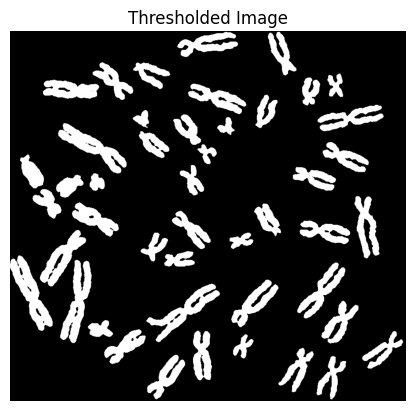

In [ ]:
# Applies thresholding to convert the grayscale image to binary image
# 0 = no chromosome, 1 = chromosome
_, threshold_img = cv2.threshold(gray_img, 150, 1, cv2.THRESH_BINARY)
plt.imshow(threshold_img, cmap="gray")
plt.title("Thresholded Image")
plt.axis("off")
plt.show()

### Countour features


In [27]:
# Finds countours
countours, hierarchy = cv2.findContours(
    threshold_img,
    cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_NONE,
)
print(f"Number of contours found: {len(countours)}")

Number of contours found: 46


In [28]:
# Creates an empty dataframe
columns = ["height", "width", "area", "perimeter", "circularity"]
features = pd.DataFrame(columns=columns)

In [29]:
for i, cnt in enumerate(countours):
    x, y, w, h = cv2.boundingRect(cnt)  # Calculates bounding box
    area = cv2.contourArea(cnt)  # Calculates area
    perimeter = cv2.arcLength(cnt, True)  # Calculates perimeter
    circularity = (4 * np.pi * area) / (perimeter**2)  # Calculates circularity
    features.loc[i] = [h, w, area, perimeter, circularity]  # Adds features to dataframe

In [30]:
print("Bounding box information:")
features

Bounding box information:


,height,width,area,perimeter,circularity
0,98.0,67.0,2174.5,421.605119,0.153730
1,101.0,86.0,3088.5,446.114786,0.195013
2,101.0,80.0,2526.0,439.587874,0.164268
3,55.0,47.0,1012.5,217.722870,0.268409
4,86.0,93.0,2277.5,442.457932,0.146192
5,113.0,43.0,3472.5,370.149276,0.318492
6,79.0,95.0,2968.5,360.575682,0.286916
7,38.0,57.0,1330.5,182.752307,0.500609
8,97.0,84.0,2917.0,463.730010,0.170457
9,133.0,167.0,5452.0,620.867093,0.177733


### Displaying bounding boxes


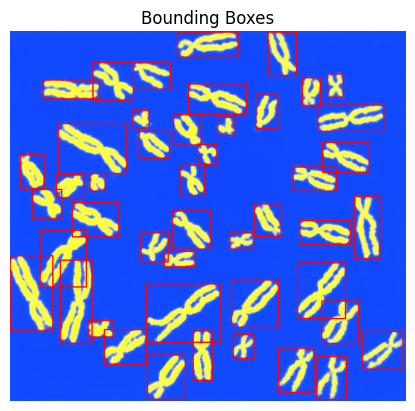

In [45]:
bounding_img = img.copy()
for cnt in countours:
    # Draws bounding box
    x, y, w, h = cv2.boundingRect(cnt)
    bounding_img = cv2.rectangle(bounding_img, (x, y), (x + w, y + h), (255, 0, 0), 2)

plt.imshow(bounding_img)
plt.title("Bounding Boxes")
plt.axis("off")
plt.show()

### Displaying rotated bounding boxes


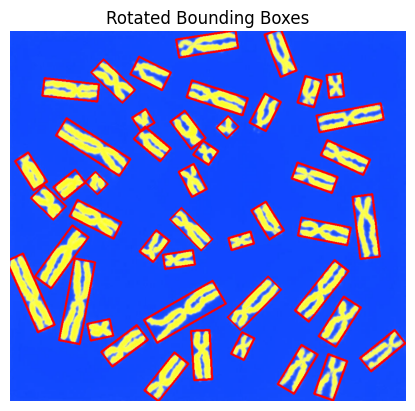

In [57]:
rot_bounding_img = img.copy()
for cnt in countours:
    # Draws rotated bounding box by calculating minimum area rectangle
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect).astype(np.int32)
    rot_bounding_img = cv2.drawContours(rot_bounding_img, [box], 0, (255, 0, 0), 3)

plt.imshow(rot_bounding_img)
plt.title("Rotated Bounding Boxes")
plt.axis("off")
plt.show()

### Standardized features


In [34]:
standardized_features = pd.DataFrame()
# Standardizes features such that mean = 0, std = 1.
for feature in features:
    mean = features[feature].mean()
    std = features[feature].std()
    standardized_features[feature] = (features[feature] - mean) / std

In [38]:
print("Standardized features:")
standardized_features

Standardized features:


,height,width,area,perimeter,circularity
0,0.522125,-0.412212,-0.350406,0.390038,-0.965660
1,0.607395,0.149837,0.324899,0.556953,-0.671835
2,0.607395,-0.027652,-0.090701,0.512504,-0.890659
3,-0.700080,-1.003841,-1.208944,-0.998434,-0.149462
4,0.181045,0.356907,-0.274304,0.532049,-1.019305
5,0.948476,-1.122167,0.608616,0.039615,0.206990
6,-0.017919,0.416070,0.236238,-0.025583,-0.017746
7,-1.183278,-0.708026,-0.973991,-1.236589,1.503161
8,0.493702,0.090674,0.198187,0.676915,-0.846604
9,1.516944,2.545937,2.071161,1.747045,-0.794821


### Normalized features


In [36]:
normalized_features = pd.DataFrame()
# Normalizes features between 0 and 1.
for feature in features:
    min_val = features[feature].min()
    max_val = features[feature].max()
    normalized_features[feature] = (features[feature] - min_val) / (max_val - min_val)

In [37]:
print("Normalized features:")
normalized_features

Normalized features:


,height,width,area,perimeter,circularity
0,0.409091,0.242424,0.272590,0.512290,0.078908
1,0.428571,0.386364,0.445010,0.555505,0.154792
2,0.428571,0.340909,0.338898,0.543997,0.098278
3,0.129870,0.090909,0.053386,0.152812,0.289701
4,0.331169,0.439394,0.292020,0.549057,0.065053
5,0.506494,0.060606,0.517450,0.421565,0.381759
6,0.285714,0.454545,0.422373,0.404685,0.323718
7,0.019481,0.166667,0.113375,0.091153,0.716512
8,0.402597,0.371212,0.412658,0.586563,0.109655
9,0.636364,1.000000,0.890870,0.863622,0.123029


## 2. Report


### Graphs of intermediate steps


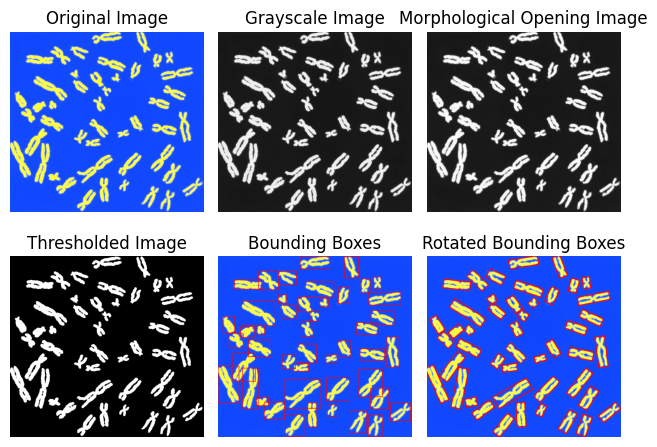

In [58]:
images = [
    # (title, img, cmap)
    ("Original Image", img, None),
    ("Grayscale Image", gray_img, "gray"),
    ("Morphological Opening Image", opening, "gray"),
    ("Thresholded Image", threshold_img, "gray"),
    ("Bounding Boxes", bounding_img, None),
    ("Rotated Bounding Boxes", rot_bounding_img, None),
]

fig = plt.figure()
for i, (title, image, cmap) in enumerate(images):
    fig.add_subplot(2, 3, i + 1)
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis("off")
plt.tight_layout()
plt.show()

### Q1: How can contour detection be used to identify objects in an image?

**Ans:** Contour detection is used to find the boundaries of the chromosomes in the image. It works by identifying the edges of chromosomes based on the pixel value differences on the thresholded image.


### Q2: What is the importance of standardization of data? What difference did you observe before and after standardization?

**Ans:** Standardization is used to convert the features to have mean = 0 and std = 1. This is important because it ensures that all features have the same scale, which reduces bias towards a particular feature.

Before standardization, the features had different scales (like area was in order of $10^4$ and circularity was in order of $10^{-1}$). After standardization, all features are in the same scale (mean = 0 and std = 1).


### Q3: Let's consider one of the values in the width column is missing. How to handle this missing value?

**Ans:** We can use one of the two methods:

1. Mean/Median imputation: Use the mean/median of the other values in the width column to fill in the missing value. But this is not very accurate for that particular chromosome.

2. Using other features: We can use the perimeter and area features to calculate the width given the height column is not missing. This will give a far more accurate value for that particular chromosome.


### Q4: What is the importance of data normalization? What difference did you observe before and after normalization?

**Ans:** Normalization is used to convert the features to lie between 0 and 1. This is important because it ensures that all features have the same scale, which reduces bias towards a particular feature.

Before normalization, the features had different scales (like area was in order of $10^4$ and circularity was in order of $10^{-1}$). After normalization, all features are in the range [0, 1].


### Q5: How might you adapt the bounding box construction process to handle overlapping or touching chromosomes?

**Ans:** To handle overlapping or touching other chromosomes, I have implemented a rotated bounding box contruction process (found [at openCV tutorials](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contour_features/py_contour_features.html#b-rotated-rectangle)). It uses the `cv2.minAreaRect()` func to compute the min area (rotated) rect that encloses the chromosome. Then the `cv2.boxPoints()` func is used to get the vertices of the rectangle. Finally, `cv2.drawContours()` is used to draw the rotated bounding box on the image. This method allows for a plotting a bounding box that fits the chromosome perfectly, reducing the overlapping. And in this case, there is no overlapping of bounding boxes after rotation.


## References


1. https://www.geeksforgeeks.org/python/python-opencv-cv2-cvtcolor-method/
2. https://www.geeksforgeeks.org/python/python-morphological-operations-in-image-processing-opening-set-1/
3. https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html
4. https://docs.opencv.org/4.x/db/d8e/tutorial_threshold.html
5. https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contour_features/py_contour_features.html
6. https://www.geeksforgeeks.org/python/find-and-draw-contours-using-opencv-python/
